In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
'''
to check which features have most importance
'''

from sklearn.ensemble import ExtraTreesRegressor

In [3]:

data = pd.read_csv("car data.csv")
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(f"data dimensions : {data.shape}")

data dimensions : (301, 9)


In [5]:
print(f"Unique values of seller type: {data['Seller_Type'].unique()}")
print(f"Unique values of Transmission type: {data['Transmission'].unique()}")
print(f"Unique values of owner type: {data['Owner'].unique()}")
print(f"Unique values of fuel type: {data['Fuel_Type'].unique()}")

Unique values of seller type: ['Dealer' 'Individual']
Unique values of Transmission type: ['Manual' 'Automatic']
Unique values of owner type: [0 1 3]
Unique values of fuel type: ['Petrol' 'Diesel' 'CNG']


In [6]:
print("\nCheck for null values: \n\n",data.isnull().any())
print("\nCheck for null values:\n\n",data.isnull().sum())


Check for null values: 

 Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Check for null values:

 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [7]:
#drop carname column
data = data.drop(['Car_Name'],axis=1)
print(f"New datset with car column removed: \n\n{data.head(5)}")


New datset with car column removed: 

   Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  
0       Manual      0  
1       Manual      0  
2       Manual      0  
3       Manual      0  
4       Manual      0  


In [8]:
data["curr"] = 2021
data["car_age"] = data['curr'] - data['Year']
print(data.head(5))

   Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  curr  car_age  
0       Manual      0  2021        7  
1       Manual      0  2021        8  
2       Manual      0  2021        4  
3       Manual      0  2021       10  
4       Manual      0  2021        7  


In [9]:

#removing "Year" and "curr" column
data= data.drop(["Year","curr"],axis=1)
print(f"after droping current year and year column:\n\n{data.head(5)}")

after droping current year and year column:

   Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  car_age  
0       Manual      0        7  
1       Manual      0        8  
2       Manual      0        4  
3       Manual      0       10  
4       Manual      0        7  


In [10]:
#using one hot encoding to convert all features into 1's ad 0's for easier computation


'''
get_dummies does one hot encoding for us.

'Owner','Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual' are all features and they will be converted into 1's and 0's
'''
data = pd.get_dummies(data,drop_first=True)

print(f"After performing one hot encoding on different features of data: \n\n{data.head(5)}")



After performing one hot encoding on different features of data: 

   Selling_Price  Present_Price  Kms_Driven  Owner  car_age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        7                 0   
1           4.75           9.54       43000      0        8                 1   
2           7.25           9.85        6900      0        4                 0   
3           2.85           4.15        5200      0       10                 0   
4           4.60           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  


In [11]:
#find how one feature is correlated to another

data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [13]:
#sns.pairplot(data)

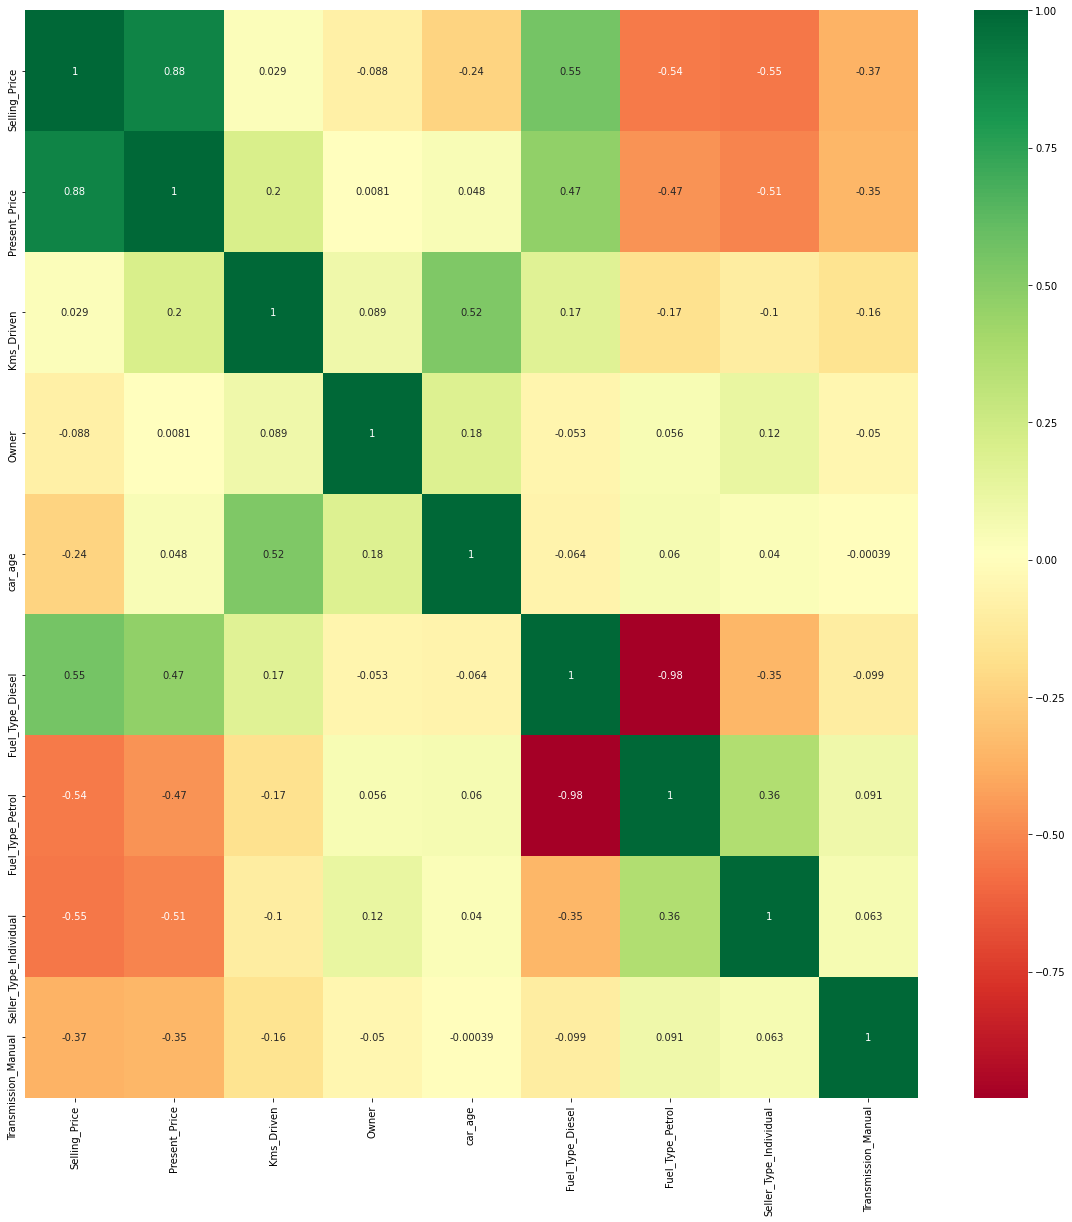

In [15]:
correl_matrix = data.corr()

top_corr_features = correl_matrix.index
plt.figure(figsize=(20,20))

heatmap_graph = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:

#independent features are in x_data
'''
other features except selling price are independent

so include all rows and columns from 2nd column till end
data.iloc[:,1:]
'''
x_data = data.iloc[:,1:]

'''
since we have to predict delling price of car using all these features its the dependent feature

data.iloc[:,0]
'''
#dependent features are in y_data
y_data = data.iloc[:,0]


print(f"Dependent feature: \n\n{y_data.head(5)}")

print(f"\n\nIndependent feature: \n\n{x_data.head(5)}")

Dependent feature: 

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


Independent feature: 

   Present_Price  Kms_Driven  Owner  car_age  Fuel_Type_Diesel  \
0           5.59       27000      0        7                 0   
1           9.54       43000      0        8                 1   
2           9.85        6900      0        4                 0   
3           4.15        5200      0       10                 0   
4           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  


In [19]:
'''
to check which features have most importance
'''

#use extratreesRegressor
model = ExtraTreesRegressor()
model.fit(x_data,y_data)

ExtraTreesRegressor()

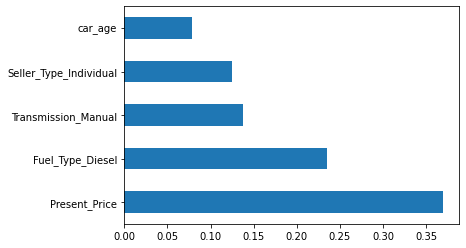

In [20]:
#to plot feature importance
feat_importance = pd.Series(model.feature_importances_,index=x_data.columns)

feat_importance.nlargest(5).plot(kind="barh")
plt.show()
